In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
insurance = pd.read_csv('Automobile_insurance_fraud.csv')
insurance.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
insurance.shape

(1000, 40)

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
insurance.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
insurance.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
insurance.drop('_c39',axis=1,inplace=True)

In [8]:
insurance.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [9]:
insurance.replace('?',np.NaN,inplace=True)
insurance

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [10]:
insurance.isin(['?']).sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [11]:
insurance['collision_type'].unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [12]:
for i in ['collision_type', 'property_damage', 'police_report_available']:
    insurance[i].fillna(insurance[i].mode()[0], inplace=True)

In [13]:
insurance.isin(['?']).sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

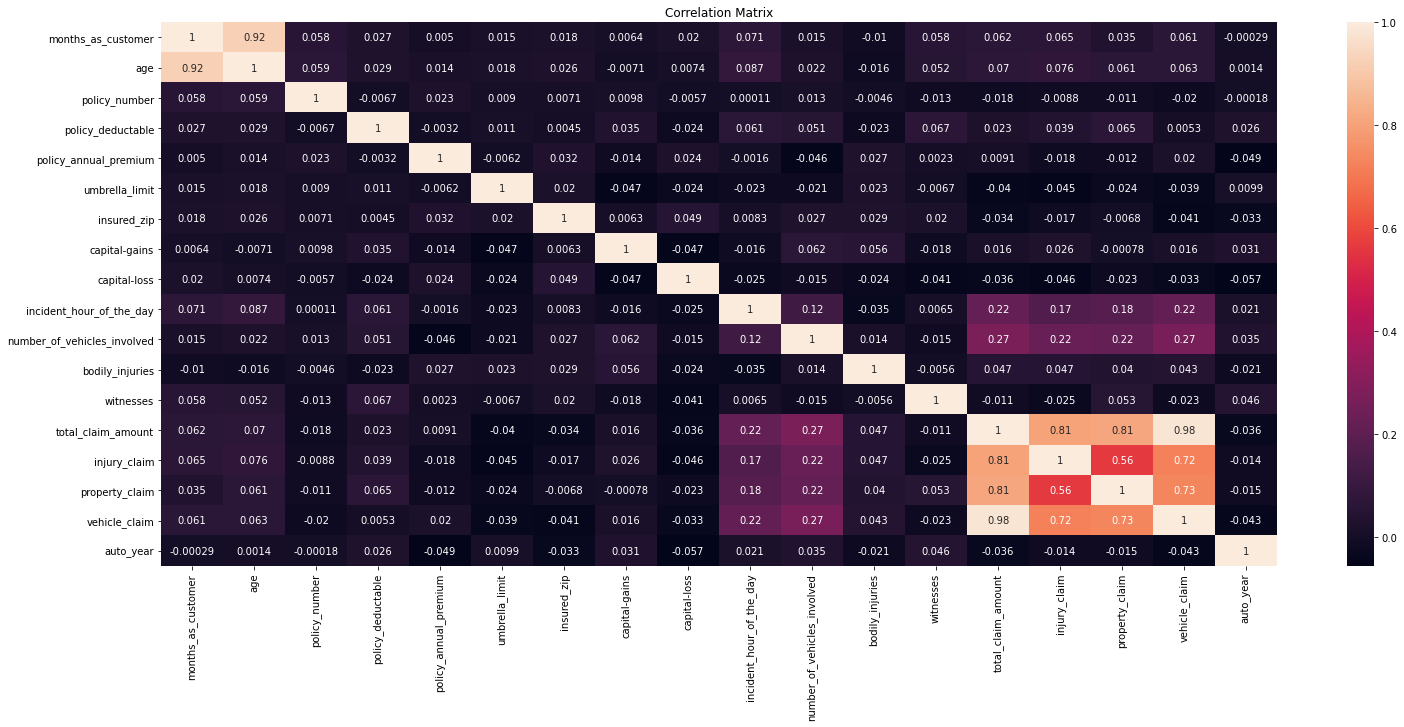

In [14]:
#chceking the relation between variables
plt.figure(figsize = (25,10))
sns.heatmap(insurance.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

#### From the heatmap it shows that injury_claim,property_claim,vehicle_claim are correlated with each other.and factor 90% correlated with months_as_customer. 

#### Visualization 

In [15]:
insurance.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

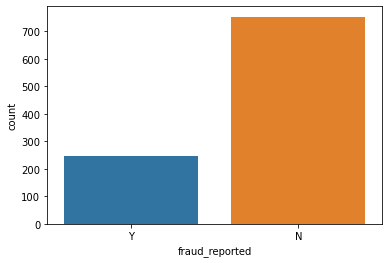

In [16]:
sns.countplot(x='fraud_reported',data=insurance)

<AxesSubplot:xlabel='policy_state', ylabel='count'>

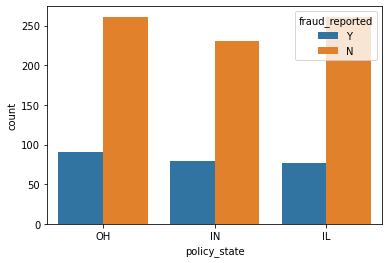

In [17]:
#policy_state Vs Fruad_reported
sns.countplot(x='policy_state',data=insurance,hue='fraud_reported')

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

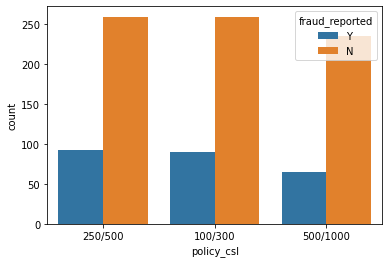

In [18]:
sns.countplot(x='policy_csl',data=insurance,hue='fraud_reported')

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

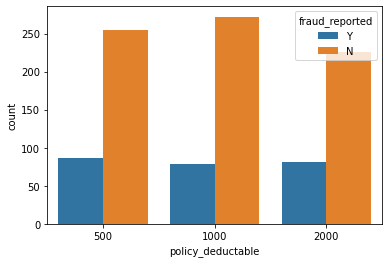

In [19]:
#policy_deductable
sns.countplot(x='policy_deductable',data=insurance,hue='fraud_reported')

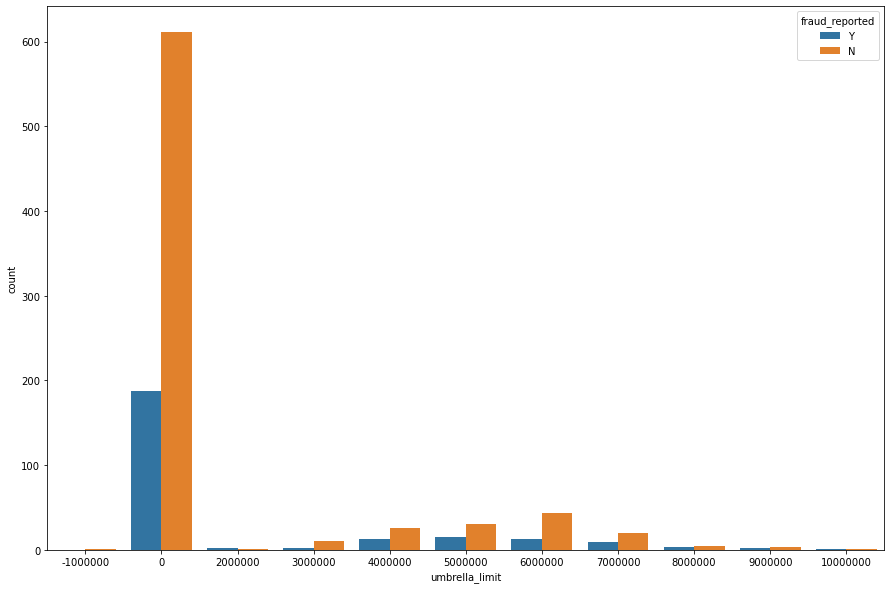

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(x='umbrella_limit',data=insurance,hue='fraud_reported')
plt.show()

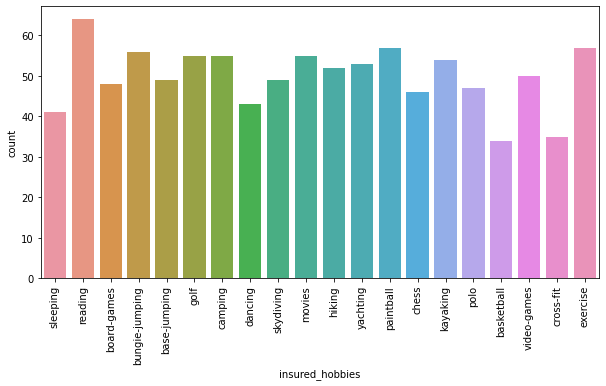

In [21]:
#insured_hobbies
plt.figure(figsize=(10,5))
sns.countplot(x='insured_hobbies',data=insurance)
plt.xticks(rotation = 90)
plt.show()

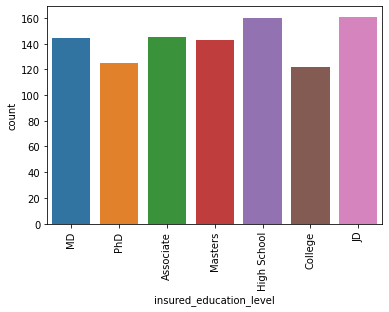

In [22]:
#insured_education_level 
sns.countplot(x='insured_education_level',data=insurance)
plt.xticks(rotation=90)
plt.show()

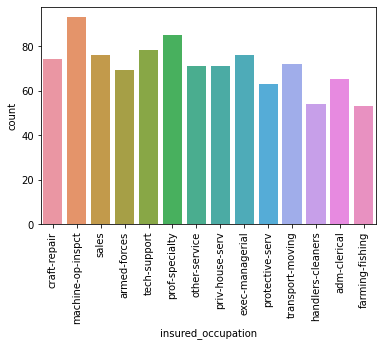

In [23]:
# insured_occupation 
sns.countplot(x='insured_occupation',data=insurance)
plt.xticks(rotation=90)
plt.show()

In [24]:
insurance.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [25]:
#Dropping some unnecessary columns
insurance.drop(columns=['age','policy_bind_date','policy_csl','auto_year','auto_make','auto_model'],inplace=True)

In [26]:
insurance.shape

(1000, 33)

In [27]:
categori = []
for column in insurance.columns:
    if insurance[column].dtype =='object':
        categori.append(column)
categori  

['policy_state',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'fraud_reported']

In [28]:
numeri = []
for column in insurance.columns:
    if insurance[column].dtype !='object':
        numeri.append(column)
numeri

['months_as_customer',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim']

In [29]:
numeric = insurance[['months_as_customer','policy_number','policy_deductable','policy_annual_premium','umbrella_limit',
                    'insured_zip','capital-gains','incident_hour_of_the_day','number_of_vehicles_involved', 'bodily_injuries',
                     'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']].copy()

In [30]:
#converting categorical columns into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categori:
    insurance[i] = le.fit_transform(insurance[i].values.reshape(-1,1))
insurance
        

,months_as_customer,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,521585,2,1000,1406.91,0,466132,1,4,2,...,1,1,1,2,1,71610,6510,13020,52080,1
1,228,342868,1,2000,1197.22,5000000,468176,1,4,6,...,1,0,0,0,0,5070,780,780,3510,1
2,134,687698,2,2000,1413.14,5000000,430632,0,6,11,...,3,0,2,3,0,34650,7700,3850,23100,0
3,256,227811,0,2000,1415.74,6000000,608117,0,6,1,...,1,0,1,2,0,63400,6340,6340,50720,1
4,228,367455,0,1000,1583.91,6000000,610706,1,0,11,...,1,0,0,1,0,6500,1300,650,4550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,941851,2,1000,1310.80,0,431289,0,5,2,...,1,1,0,1,0,87200,17440,8720,61040,0
996,285,186934,0,1000,1436.79,0,608177,0,6,9,...,1,1,2,3,0,108480,18080,18080,72320,0
997,130,918516,2,500,1383.49,3000000,442797,0,5,1,...,3,0,2,3,1,67500,7500,7500,52500,0
998,458,533940,0,2000,1356.92,5000000,441714,1,0,5,...,1,0,0,1,1,46980,5220,5220,36540,0


In [31]:
#check for the skewness of the data
numeric.skew()

months_as_customer             0.362177
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
dtype: float64

In [32]:
# Reduce the skewness by using PowerTransformation 
from sklearn.preprocessing import power_transform

numeric_new = power_transform(numeric)

numeric=pd.DataFrame(numeric_new,columns=numeric.columns)
numeric

,months_as_customer,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,1.051279,-0.023156,0.067784,0.616676,-0.349113,0.0,1.033234,-0.911676,-0.843679,0.108332,0.517616,0.715714,0.005762,1.081793,0.753697
1,0.304536,-0.745292,1.271863,-0.242577,1.357817,0.0,-0.982948,-0.441383,-0.843679,-1.254857,-1.410682,-1.776979,-1.525347,-1.557391,-1.786629
2,-0.511226,0.587931,1.271863,0.642206,1.357817,0.0,0.960141,-0.593040,1.189521,1.178068,1.290743,-0.716825,0.223833,-0.577507,-0.820881
3,0.523344,-1.266438,1.271863,0.652860,1.644005,0.0,1.018186,-0.911676,-0.843679,0.108332,0.517616,0.391426,-0.026762,-0.034793,0.677602
4,0.304536,-0.640684,0.067784,1.342030,1.644005,0.0,1.070503,1.151959,-0.843679,-1.254857,-0.355794,-1.729802,-1.304154,-1.622102,-1.740038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.287530,1.449469,0.067784,0.222833,-0.349113,0.0,-0.982948,1.151959,-0.843679,-1.254857,-0.355794,1.338829,1.638435,0.403281,1.259186
996,0.741446,-1.468221,0.067784,0.739122,-0.349113,0.0,1.082972,1.508938,-0.843679,1.178068,1.290743,2.202447,1.717091,1.767003,1.904757
997,-0.549706,1.373308,-1.211269,0.520703,0.756509,0.0,0.960141,-1.080756,1.189521,1.178068,1.290743,0.553012,0.188267,0.186095,0.777232
998,1.912654,0.023977,1.271863,0.411823,1.357817,0.0,-0.982948,-1.447906,-0.843679,-1.254857,-0.355794,-0.247520,-0.251353,-0.265012,-0.104258


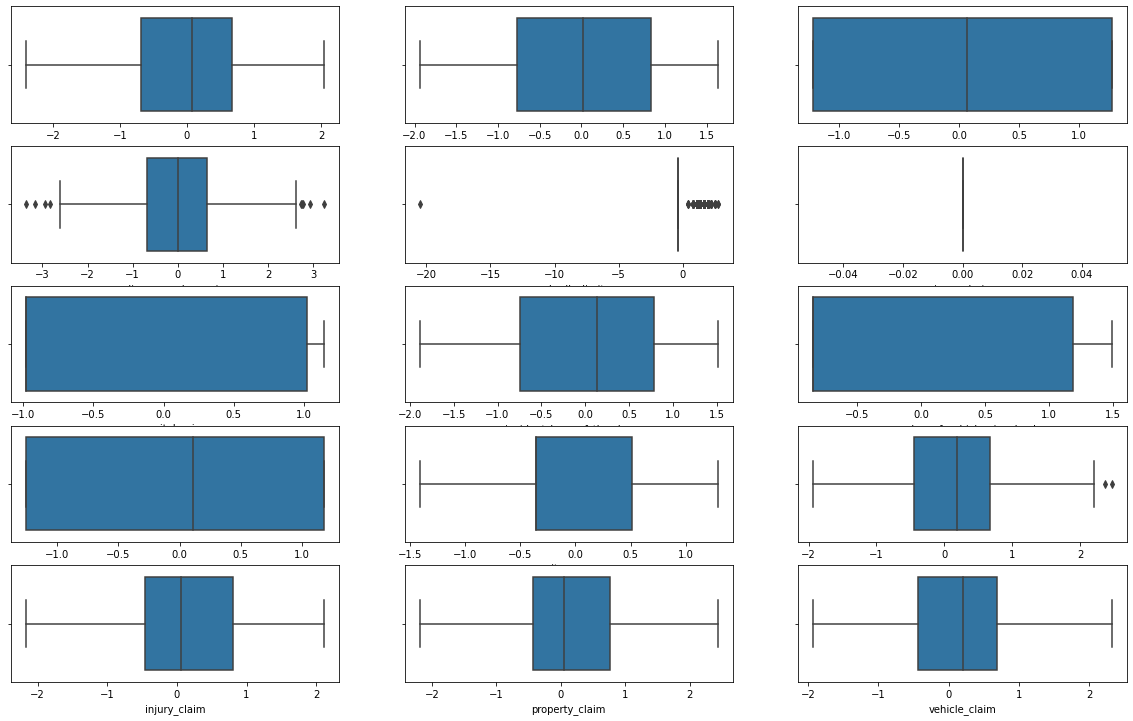

In [33]:
#check for outliers
plt.figure(figsize = (20,15))
plotnumber = 1

for column in numeric:
    if plotnumber <=16:
        ax =  plt.subplot(6,3,plotnumber)
        sns.boxplot(numeric[column])
        plt.xlabel(column,fontsize = 10)
        
    plotnumber +=1
plt.show()

In [35]:
insurance_F = pd.concat([insurance[categori],numeric],axis=1)

In [36]:
insurance_F

,policy_state,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,...,insured_zip,capital-gains,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,2,1,4,2,17,0,49,2,2,0,...,0.0,1.033234,-0.911676,-0.843679,0.108332,0.517616,0.715714,0.005762,1.081793,0.753697
1,1,1,4,6,15,2,41,3,1,1,...,0.0,-0.982948,-0.441383,-0.843679,-1.254857,-1.410682,-1.776979,-1.525347,-1.557391,-1.786629
2,2,0,6,11,2,3,44,0,1,1,...,0.0,0.960141,-0.593040,1.189521,1.178068,1.290743,-0.716825,0.223833,-0.577507,-0.820881
3,0,0,6,1,2,4,19,2,0,0,...,0.0,1.018186,-0.911676,-0.843679,0.108332,0.517616,0.391426,-0.026762,-0.034793,0.677602
4,0,1,0,11,2,4,34,3,1,1,...,0.0,1.070503,1.151959,-0.843679,-1.254857,-0.355794,-1.729802,-1.304154,-1.622102,-1.740038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,0,5,2,13,4,44,2,0,1,...,0.0,-0.982948,1.151959,-0.843679,-1.254857,-0.355794,1.338829,1.638435,0.403281,1.259186
996,0,0,6,9,17,5,47,2,1,0,...,0.0,1.082972,1.508938,-0.843679,1.178068,1.290743,2.202447,1.717091,1.767003,1.904757
997,2,0,5,1,3,2,45,0,2,1,...,0.0,0.960141,-1.080756,1.189521,1.178068,1.290743,0.553012,0.188267,0.186095,0.777232
998,0,1,0,5,0,5,52,2,1,0,...,0.0,-0.982948,-1.447906,-0.843679,-1.254857,-0.355794,-0.247520,-0.251353,-0.265012,-0.104258


In [38]:
insurance_F.columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'fraud_reported', 'months_as_customer', 'policy_number',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'capital-gains', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [47]:
insurance_F.drop('fraud_reported',axis=1,inplace=True)

In [48]:
#Dividing the target and Feature variable
x = insurance_F.copy()
y = insurance['fraud_reported']

In [49]:
x

,policy_state,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,...,insured_zip,capital-gains,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,2,1,4,2,17,0,49,2,2,0,...,0.0,1.033234,-0.911676,-0.843679,0.108332,0.517616,0.715714,0.005762,1.081793,0.753697
1,1,1,4,6,15,2,41,3,1,1,...,0.0,-0.982948,-0.441383,-0.843679,-1.254857,-1.410682,-1.776979,-1.525347,-1.557391,-1.786629
2,2,0,6,11,2,3,44,0,1,1,...,0.0,0.960141,-0.593040,1.189521,1.178068,1.290743,-0.716825,0.223833,-0.577507,-0.820881
3,0,0,6,1,2,4,19,2,0,0,...,0.0,1.018186,-0.911676,-0.843679,0.108332,0.517616,0.391426,-0.026762,-0.034793,0.677602
4,0,1,0,11,2,4,34,3,1,1,...,0.0,1.070503,1.151959,-0.843679,-1.254857,-0.355794,-1.729802,-1.304154,-1.622102,-1.740038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,0,5,2,13,4,44,2,0,1,...,0.0,-0.982948,1.151959,-0.843679,-1.254857,-0.355794,1.338829,1.638435,0.403281,1.259186
996,0,0,6,9,17,5,47,2,1,0,...,0.0,1.082972,1.508938,-0.843679,1.178068,1.290743,2.202447,1.717091,1.767003,1.904757
997,2,0,5,1,3,2,45,0,2,1,...,0.0,0.960141,-1.080756,1.189521,1.178068,1.290743,0.553012,0.188267,0.186095,0.777232
998,0,1,0,5,0,5,52,2,1,0,...,0.0,-0.982948,-1.447906,-0.843679,-1.254857,-0.355794,-0.247520,-0.251353,-0.265012,-0.104258


In [50]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

In [51]:
#Data scaling
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)


In [52]:
#traing the model
from sklearn.model_selection import train_test_split,GridSearchCV

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

maxAccu =0
maxRs =0
for i in range(1,100):
    x_train,x_test,y_train,y_test =train_test_split(x_scaled,y,test_size =.20,random_state=i)
    lr = LogisticRegression()  
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc = accuracy_score(y_test,predlr)
    if acc>maxAccu :
        maxAccu =acc
        maxRs =i
print("Best accuracy is:",maxAccu,"On Random state:",maxRs)

pred_lr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_lr)*100)
print('\n',confusion_matrix(y_test,pred_lr))
print("Classification Report:\n",classification_report(y_test,pred_lr))
print("")

Best accuracy is: 0.85 On Random state: 31
Accuracy 76.5

 [[136  14]
 [ 33  17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       150
           1       0.55      0.34      0.42        50

    accuracy                           0.77       200
   macro avg       0.68      0.62      0.64       200
weighted avg       0.74      0.77      0.74       200




In [54]:
#cross_validation for LogisticRegression
from sklearn.model_selection import cross_val_score

crv = cross_val_score(lr,x,y,cv=10)
print("Cross validation score of LogisticRegression Model",crv.mean())

Cross validation score of LogisticRegression Model 0.782


In [58]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.25,random_state=31)

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

pred_rf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_rf)*100)
print('\nConfusion Matric:\n',confusion_matrix(y_test,pred_rf))
print("\nClassification Report:",classification_report(y_test,pred_rf))

Accuracy 80.13333333333334

Confusion Matric:
 [[529  43]
 [106  72]]

Classification Report:               precision    recall  f1-score   support

           0       0.83      0.92      0.88       572
           1       0.63      0.40      0.49       178

    accuracy                           0.80       750
   macro avg       0.73      0.66      0.68       750
weighted avg       0.78      0.80      0.79       750



In [59]:
clf = RandomForestClassifier()

params = {'n_estimators':[13,15],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}
grd = GridSearchCV(clf,param_grid=params)
grd.fit(x_train,y_train)

print('best_params= >',grd.best_params_)

#RandomForest Classifier

clf = grd.best_estimator_

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

rf_conf_mat = confusion_matrix(y_test,y_pred)

print("\n Accuracy RandomForest Normal===>",accuracy_score(y_test,y_pred))
print("\n Confusion_mat:",'\n',rf_conf_mat)
print('\n')
report =classification_report(y_test,y_pred)
print(report)

best_params= > {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 13}

 Accuracy RandomForest Normal===> 0.7733333333333333

 Confusion_mat: 
 [[549  23]
 [147  31]]


              precision    recall  f1-score   support

           0       0.79      0.96      0.87       572
           1       0.57      0.17      0.27       178

    accuracy                           0.77       750
   macro avg       0.68      0.57      0.57       750
weighted avg       0.74      0.77      0.72       750



In [60]:
#cross_validation for RandomForest
from sklearn.model_selection import cross_val_score

crv = cross_val_score(clf,x,y,cv=10)
print("Cross validation score of LogisticRegression Model",crv.mean())

Cross validation score of LogisticRegression Model 0.7619999999999999


In [61]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

pred_dt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_dt)*100)
print('\n',confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

Accuracy 79.73333333333333

 [[491  81]
 [ 71 107]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       572
           1       0.57      0.60      0.58       178

    accuracy                           0.80       750
   macro avg       0.72      0.73      0.73       750
weighted avg       0.80      0.80      0.80       750



In [62]:
#cross_validation for DecisionTree

crv = cross_val_score(dt,x,y,cv=10)
print("Cross validation score of DecisionTree Model",crv.mean())

Cross validation score of DecisionTree Model 0.7849999999999999


# From the model building i observed one thing that Accuracy score and CV score are
#### For LogisticRegression Accuracyscore is : 76% and CV Score:78%
#### for RandomForest Accuracyscore is : 80% and CV Score:76%
#### For Decision Tree Accuracyscore is : 79% and CV Score:78%
#### So,from the result im considering the RandomForestClassifier is best for my model

In [63]:
#AUC_ROC_CURve
pred_prob_lr = lr.predict_proba(x_test)
pred_prob_dt = dt.predict_proba(x_test)
pred_prob_clf= clf.predict_proba(x_test)

from sklearn.metrics import roc_curve

# roc curve for models
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, pred_prob_lr[:,1], pos_label=1)
fpr_dt, tpr_dt, thresh_dt = roc_curve(y_test, pred_prob_dt[:,1], pos_label=1)
fpr_clf, tpr_clf, thresh_clf = roc_curve(y_test, pred_prob_clf[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score_lr = roc_auc_score(y_test, pred_prob_lr[:,1])
auc_score_dt = roc_auc_score(y_test, pred_prob_dt[:,1])
auc_score_clf = roc_auc_score(y_test, pred_prob_clf[:,1])

print("AUC_score for linearRegression :",auc_score_lr, "\n AUC_score for DecisionTree Classifier:",auc_score_dt,
      "\n AUC_score for RandomForestClassifier:",auc_score_clf)

AUC_score for linearRegression : 0.6391726251276812 
 AUC_score for DecisionTree Classifier: 0.7297576019486132 
 AUC_score for RandomForestClassifier: 0.7356849611063094


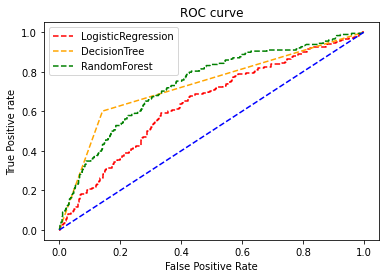

In [64]:
# plot roc curves
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='red', label='LogisticRegression')
plt.plot(fpr_dt, tpr_dt, linestyle='--',color='orange', label='DecisionTree')
plt.plot(fpr_clf, tpr_clf, linestyle='--',color='green', label='RandomForest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

#### From the curve we can observe that DecisionTree and RandomForest giving the same results.

In [65]:
#Saving the model
import joblib
joblib.dump(rf,"insurance_frud.pkl")

['insurance_frud.pkl']